In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import warnings
from typing import Tuple

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

# ATTN:

# ThisNotebook was originally written in the folder to analyze the DCC files, but I started writing ingestion code in this notebook, so I moved it here.
# there is still an old version in the folder to analyze the DCC's data.

In [2]:
def fill_missing_cols(df):
    
    if 'node_id' not in df.columns:
        raise ValueError('Must have at least a "node_id" column.')
        
    all_cols = set([ 'node_label', 'node_synonyms', 'node_dbxrefs',
            'node_definition','node_namespace','value','lowerbound','upperbound','unit'])
   
    missing_cols = list(all_cols - set(df.columns))
    nan_cols_df = pd.DataFrame(np.full([len(df), len(missing_cols)], np.nan),columns=missing_cols)
    nan_cols_df.index = df.index
    return pd.concat([df,nan_cols_df],axis=1)

In [3]:
''' From Jimmy Zhen @ MOTORPAC (jzhen@stanford.edu) on 3/15/2023
I am attaching 2 example DE analysis files from gastrocnemius muscle. 
The timewise table are results from performing pairwise contrasts between 
each group of trained animals and the sex-matched control group for a single
tissue at each timepoint, with analysis performed separately for males and females.
The training table are results from performing a likelihood ratio test to test the 
effect of training across time points, also performed separately for males and females.
 
As you pointed out, fold change and p-value comparisons would be useful for us to 
communicate the MoTrPAC data. We really appreciate you helping us to determine the 
concepts/entities as nodes in the data and to move forward with this matter.
 
Please take a look at the attached example DEA files (RNA-seq only) and let us know
if you have any questions.
'''


'''  Me to MOTORPAC, 3/17
Hi MOTORPAC,
 
Thanks for the productive meeting yesterday.
 
Attached is a proposed schema for your RNAseq training dataset (this is the distilled dataset and does not
contain the time series data). I wrote the type of node inside each node and then I gave an example node_id
next to it. I colored each SAB purple and each code green for clarities sake. The node_id (both the SAB and code)
for the central MOTORPAC node can be changed to something else if you'd like. This is just how we modeled the 
GTEx eQTLs and it seemed to work out nicely. There are two decisions that still need to be made regarding this 
schema -- one in reference to what gene ontology to use and one in reference to how to model the p-values. P-values
can either be on the MOTORPAC node as an additional property or have the MOTORPAC node connected to an actual
p-value node. Both of these issues rely on decisions we need to make on our end, so don't worry about them right now.
 
I also have two questions:
It looks like there are just 566 rows that have an adjusted P-value less than 0.05, are you planning on including just these significant gene DE for each tissue? 
Are you using any specific ontology for the tissues in your dataset?
 '''


"  Me to MOTORPAC, 3/17\nHi MOTORPAC,\n \nThanks for the productive meeting yesterday.\n \nAttached is a proposed schema for your RNAseq training dataset (this is the distilled dataset and does not\ncontain the time series data). I wrote the type of node inside each node and then I gave an example node_id\nnext to it. I colored each SAB purple and each code green for clarities sake. The node_id (both the SAB and code)\nfor the central MOTORPAC node can be changed to something else if you'd like. This is just how we modeled the \nGTEx eQTLs and it seemed to work out nicely. There are two decisions that still need to be made regarding this \nschema -- one in reference to what gene ontology to use and one in reference to how to model the p-values. P-values\ncan either be on the MOTORPAC node as an additional property or have the MOTORPAC node connected to an actual\np-value node. Both of these issues rely on decisions we need to make on our end, so don't worry about them right now.\n \nI 

# email recieved on 6/12/23

As we discussed last Friday, I have uploaded the endurance training young adult rats RNA-seq files for the gastrocnemius/heart/liver tissues to Globus at the following location:
`/projects/data-distillery/Import/MoTrPAC/pilot_project_data.zip`
 
The subdirectories in the results directory contain quantitative results for the tissues
- The dea and normalized-data subdirectories contain differential expression and normalized data for the tissues
- The merged, resources and feature-annot subdirectories contain analysis resource data shared by the tissues
- The motrpac-mappings-master_feature_to_gene.txt.zip file, which was already uploaded to Globus in the past, would be part of the shared analysis data in the resources subdirectory

# MOTORPAC RNA-SEQ SCHEMA.
## I am formatting the RNA-SEQ data myself here

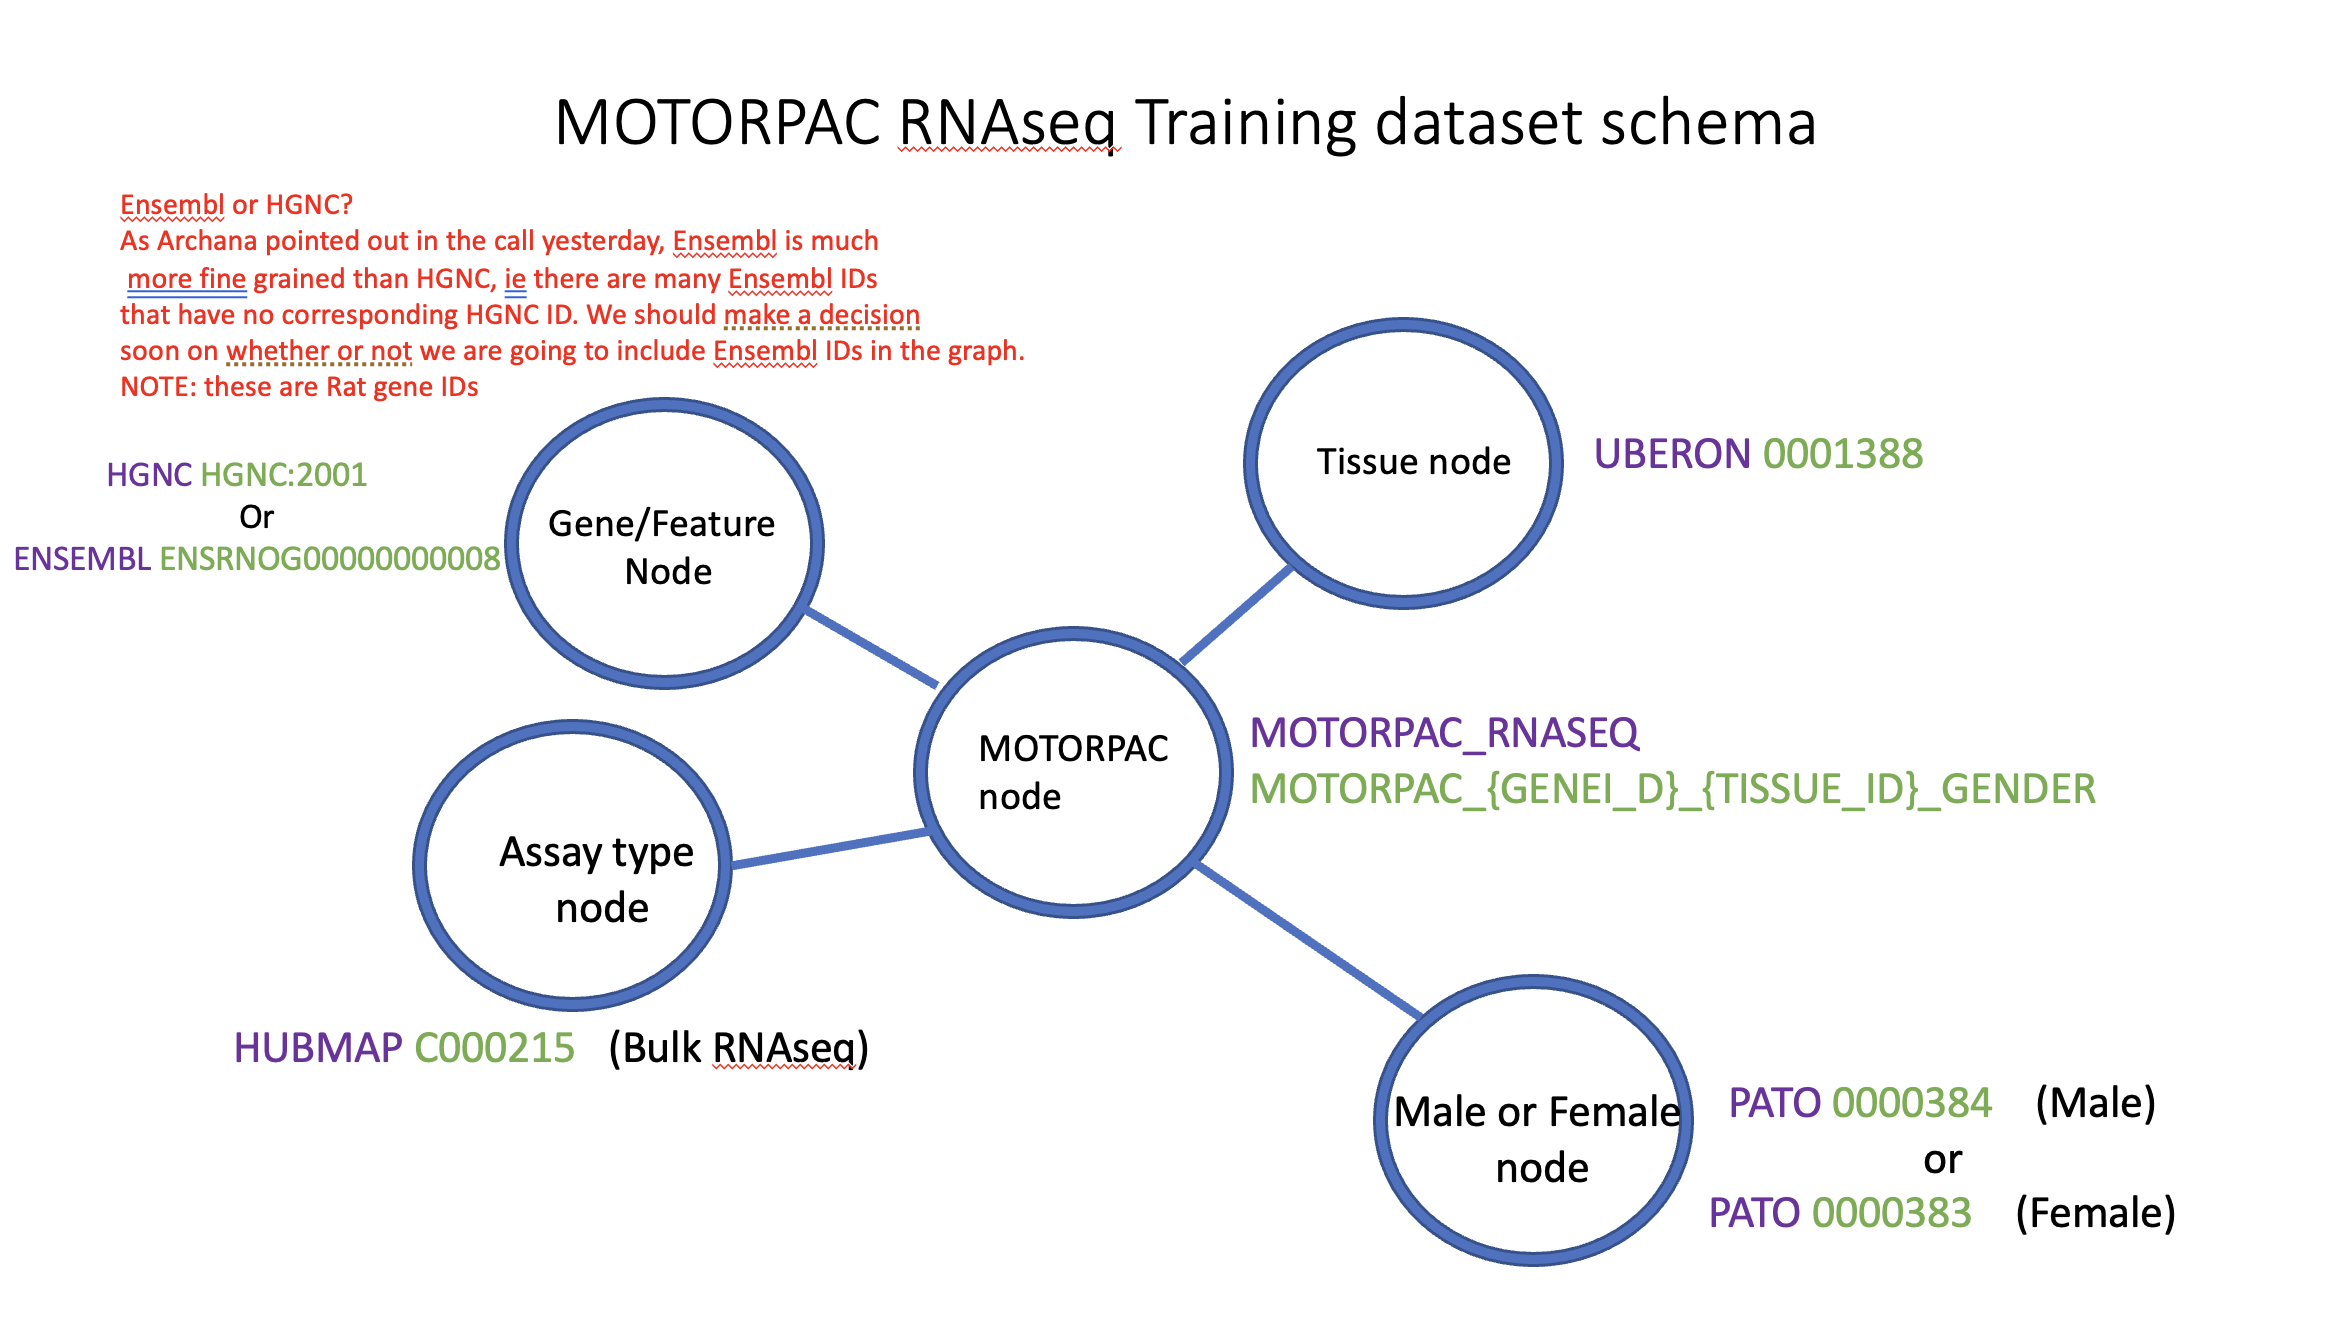

In [4]:
Image(filename='/Users/stearb/Dropbox/Screenshots/motorpac_rna_schema.png',width=900)

In [5]:
path= '/Users/stearb/Desktop/DESKTOP_TRANSFER/DataDistilleryFiles/MOTORPAC/'

In [6]:
#dftpm = pd.read_csv(path+'motrpac_pass1b-06_t55-gastrocnemius_transcript-rna-seq_rsem-genes-tpm.txt',sep='\t')
#dftpm

In [7]:
# NOT USING THE TIME SERIES RNA-SEQ DATASET
#df = pd.read_csv(path+'pass1b-06_t55-gastrocnemius_transcript-rna-seq_timewise-dea-fdr_20211008.txt.zip',sep='\t')

# other datasets from the results sub-folder that were not using
#path='/Users/stearb/Downloads/pilot_project_data/results/transcriptomics/gastrocnemius/'
#dfgc = pd.read_csv(path+'motrpac_pass1b-06_t55-gastrocnemius_transcript-rna-seq_rsem-genes-count.txt',sep='\t')
#dfgc

#dffp = pd.read_csv(path+'motrpac_pass1b-06_t55-gastrocnemius_transcript-rna-seq_rsem-genes-fpkm.txt',sep='\t')
#dffp

#dftpm = pd.read_csv(path+'motrpac_pass1b-06_t55-gastrocnemius_transcript-rna-seq_rsem-genes-tpm.txt',sep='\t')
#dftpm

In [8]:
'''
p='/Users/stearb/Downloads/pilot_project_data/analysis/transcriptomics/dea/'
dfgfdr = pd.read_csv(p+'pass1b-06_t55-gastrocnemius_transcript-rna-seq_training-dea-fdr_20211008.txt',sep='\t')
dfgfdr

p='/Users/stearb/Downloads/pilot_project_data/analysis/transcriptomics/normalized-data/'
dfgnorm = pd.read_csv(p+'motrpac_pass1b-06_t55-gastrocnemius_transcript-rna-seq_normalized-log-cpm.txt',sep='\t')
dfgnorm


p='/Users/stearb/Downloads/pilot_project_data/analysis/'
dfts = pd.read_csv(p+'motrpac_pass1b-06_t55-gastrocnemius_transcript-rna-seq_normalized-log-cpm.txt',sep='\t')
dfts
'''

"\np='/Users/stearb/Downloads/pilot_project_data/analysis/transcriptomics/dea/'\ndfgfdr = pd.read_csv(p+'pass1b-06_t55-gastrocnemius_transcript-rna-seq_training-dea-fdr_20211008.txt',sep='\t')\ndfgfdr\n\np='/Users/stearb/Downloads/pilot_project_data/analysis/transcriptomics/normalized-data/'\ndfgnorm = pd.read_csv(p+'motrpac_pass1b-06_t55-gastrocnemius_transcript-rna-seq_normalized-log-cpm.txt',sep='\t')\ndfgnorm\n\n\np='/Users/stearb/Downloads/pilot_project_data/analysis/'\ndfts = pd.read_csv(p+'motrpac_pass1b-06_t55-gastrocnemius_transcript-rna-seq_normalized-log-cpm.txt',sep='\t')\ndfts\n"

## Define paths and tissue parameters

In [9]:
filename_gastroc='pass1b-06_t55-gastrocnemius_transcript-rna-seq_training-dea-fdr_20211008.txt'
filename_heart='pass1b-06_t58-heart_transcript-rna-seq_training-dea-fdr_20211008.txt'
filename_liver='pass1b-06_t68-liver_transcript-rna-seq_training-dea-fdr_20211008.txt'

# DEfine UBERON CODE ID
UBERON_GASTROC_CODEID = 'UBERON_0001388'
UBERON_HEART_CODEID = 'UBERON_0000948'
UBERON_LIVER_CODEID = 'UBERON_0002107'

#HUBMAP_BULK_RNASEQ_ASSAY_CODEID = 'HUBMAP C000215'

PATO_MALE_CODEID = 'PATO 0000384'
PATO_FEMALE_CODEID = 'PATO 0000383'

# Loop through this list of tuples
filename_Ls = [(filename_gastroc,'gastrocnemius',UBERON_GASTROC_CODEID),
                (filename_heart,'heart',UBERON_HEART_CODEID),
                (filename_liver,'liver',UBERON_LIVER_CODEID)]

### Must include Ensembl CodeIDs in the nodes.tsv file b/c they are Rat gene ids and are NOT in the graph

In [10]:
def make_dataset(file_tissue_tuple: Tuple[str, str]):
    '''Read in tissue specific datasets and extract columns'''
    
    TISSUE_STRING = file_tissue_tuple[1]
    UBERON_TISSUE_CODEID = file_tissue_tuple[2]
    
    df = pd.read_csv(path+file_tissue_tuple[0],sep='\t')
    
    df['uberon_codeID']  = UBERON_TISSUE_CODEID
    #df['assay_codeID'] = HUBMAP_BULK_RNASEQ_ASSAY_CODEID
    df['male_codeID'] = PATO_MALE_CODEID
    df['female_codeID'] = PATO_FEMALE_CODEID
    
    # Define ENSEMBL CODE ID
    df['ensembl_codeID'] = ['ENSEMBL '+i for i in df['feature_ID']]

    # Define MALE MOTORPAC CODE ID                            
    df['motorpac_codeID_male'] = 'MOTRPAC '+df['feature_ID'] +'-'+ TISSUE_STRING +'-'+ 'male'

    # Define FEMALE MOTORPAC CODE ID                            # should this be uberon code?
    df['motorpac_codeID_female'] = 'MOTRPAC '+df['feature_ID'] +'-'+ TISSUE_STRING +'-'+ 'female'

    # Create nodes (MOTORPAC male and female)
    #node_id_male = df[['motorpac_codeID_male','p_value_male','ensembl_codeID']].rename(
    #              columns={'motorpac_codeID_male':'node_id','p_value_male':'value'})
    #node_id_female = df[['motorpac_codeID_female','p_value_female','ensembl_codeID']].rename(
    #                  columns={'motorpac_codeID_female':'node_id','p_value_female':'value'})
    #nodes = pd.concat([node_id_male,node_id_female]) 
    #nodes = nodes[nodes['value'] < .05].dropna().reset_index(drop=True)
    # add just the genes that have pvals < .05
    #nodes_ensembl = pd.DataFrame(nodes['ensembl_codeID'].values,columns=['node_id'])
    #nodes = pd.concat([nodes,nodes_ensembl],axis=0).reset_index(drop=True).drop('ensembl_codeID',axis=1)
    #nodes = fill_missing_cols(nodes).drop_duplicates() # drop gene ids that appear in both male/female
    
    #########################################
    ########## Create nodes #################
    #########################################
    
    # Create MOTORPAC nodes (male AND female nodes). each have p-values as the 'value' column
    node_id_male = df[['motorpac_codeID_male','p_value_male','ensembl_codeID']].rename(
                  columns={'motorpac_codeID_male':'node_id','p_value_male':'value'})
    
    node_id_female = df[['motorpac_codeID_female','p_value_female','ensembl_codeID']].rename(
                      columns={'motorpac_codeID_female':'node_id','p_value_female':'value'})
    
    nodes = pd.concat([node_id_male,node_id_female])
    nodes = nodes[nodes['value'] < .05].dropna().reset_index(drop=True)
    nodes_ensembl = pd.DataFrame(nodes['ensembl_codeID'].values,columns=['node_id'])
    nodes = pd.concat([nodes,nodes_ensembl],axis=0).reset_index(drop=True).drop('ensembl_codeID',axis=1)
    nodes = fill_missing_cols(nodes).drop_duplicates() # drop gene ids that appear in both male/female
    
    ##########################
    ###### Create edges ######
    ##########################
    
    # predicates (relationships)
    df['MP_ENSEMBL_PREDICATE'] = 'associated_with'
    df['MP_UB_PREDICATE'] =    'located_in'    #'http://purl.obolibrary.org/obo/RO_0001025'

    # MOTORPAC TO ENSEMBL
    MP_ENSEMBL_MALE = df[['motorpac_codeID_male','MP_ENSEMBL_PREDICATE','ensembl_codeID']]
    MP_ENSEMBL_FEMALE = df[['motorpac_codeID_female','MP_ENSEMBL_PREDICATE','ensembl_codeID']]

    # MOTORPAC to TISSUE (UBERON)
    MP_UB_MALE = df[['motorpac_codeID_male','MP_UB_PREDICATE','uberon_codeID']]
    MP_UB_FEMALE = df[['motorpac_codeID_female','MP_UB_PREDICATE','uberon_codeID']]

    # filter for only genes that we included in the nodes file ( pval < .05)
    MP_UB_MALE = MP_UB_MALE[MP_UB_MALE['motorpac_codeID_male'].isin(nodes['node_id'])]
    MP_UB_FEMALE = MP_UB_FEMALE[MP_UB_FEMALE['motorpac_codeID_female'].isin(nodes['node_id'])]
    
    MP_ENSEMBL_MALE = MP_ENSEMBL_MALE[MP_ENSEMBL_MALE['motorpac_codeID_male'].isin(nodes['node_id'])]
    MP_ENSEMBL_FEMALE = MP_ENSEMBL_FEMALE[MP_ENSEMBL_FEMALE['motorpac_codeID_female'].isin(nodes['node_id'])]

    df['male_CodeID'] = PATO_MALE_CODEID
    df['female_CodeID'] = PATO_FEMALE_CODEID
    df['MP_SEX_PREDICATE'] = 'sex' # changed from 'gender'
    
    # MOTORPAC TO GENDER
    MP_SEX_MALE = df[['motorpac_codeID_male','MP_SEX_PREDICATE','male_CodeID']]
    MP_SEX_FEMALE = df[['motorpac_codeID_female','MP_SEX_PREDICATE','female_CodeID']]
    
    edges = pd.DataFrame(np.concatenate([MP_ENSEMBL_MALE.values,
                             MP_ENSEMBL_FEMALE.values,
                             MP_UB_MALE,
                             MP_UB_FEMALE,
                             MP_SEX_MALE,
                             MP_SEX_FEMALE],axis=0),columns=['subject','predicate','object'])\
                            .drop_duplicates().reset_index(drop=True)
    
    edges = edges[edges['subject'].isin(nodes['node_id'])]
    
    return nodes, edges

In [48]:
filename_Ls[0]

('pass1b-06_t55-gastrocnemius_transcript-rna-seq_training-dea-fdr_20211008.txt',
 'gastrocnemius',
 'UBERON_0001388')

In [7]:
'''file_tissue_tuple = filename_Ls[0]

TISSUE_STRING = file_tissue_tuple[1]
UBERON_TISSUE_CODEID = file_tissue_tuple[2]

df = pd.read_csv(path+file_tissue_tuple[0],sep='\t')

df['uberon_codeID']  = UBERON_TISSUE_CODEID
#df['assay_codeID'] = HUBMAP_BULK_RNASEQ_ASSAY_CODEID
df['male_codeID'] = PATO_MALE_CODEID
df['female_codeID'] = PATO_FEMALE_CODEID

# Define ENSEMBL CODE ID
df['ensembl_codeID'] = ['ENSEMBL '+i for i in df['feature_ID']]

# Define MALE MOTORPAC CODE ID                            
df['motorpac_codeID_male'] = 'MOTORPAC '+df['feature_ID'] +'-'+ TISSUE_STRING +'-'+ 'male'

# Define FEMALE MOTORPAC CODE ID                            # should this be uberon code?
df['motorpac_codeID_female'] = 'MOTORPAC '+df['feature_ID'] +'-'+ TISSUE_STRING +'-'+ 'female'
'''

In [7]:
'''
########## Create nodes #################

# Create MOTORPAC nodes (male AND female nodes). each have p-values as the 'value' column
node_id_male = df[['motorpac_codeID_male','p_value_male','ensembl_codeID']].rename(
              columns={'motorpac_codeID_male':'node_id','p_value_male':'value'})

node_id_female = df[['motorpac_codeID_female','p_value_female','ensembl_codeID']].rename(
                  columns={'motorpac_codeID_female':'node_id','p_value_female':'value'})
                  

nodes = pd.concat([node_id_male,node_id_female])
print(nodes.shape)


nodes = nodes[nodes['value'] < .05].dropna().reset_index(drop=True)
print(nodes.shape)

nodes['value'] = [np.round(i,4) for i in nodes['value']]

nodes_ensembl = pd.DataFrame(nodes['ensembl_codeID'].values,columns=['node_id'])
nodes = pd.concat([nodes,nodes_ensembl],axis=0).reset_index(drop=True).drop('ensembl_codeID',axis=1)
nodes = fill_missing_cols(nodes).drop_duplicates() # drop gene ids that appear in both male/female
nodes
'''

In [17]:
'''
##########################
###### Create edges ######
##########################

# predicates (relationships)
df['MP_ENSEMBL_PREDICATE'] = 'associated_with'
df['MP_UB_PREDICATE'] = 'located_in' #'http://purl.obolibrary.org/obo/RO_0001025'

# MOTORPAC TO ENSEMBL
MP_ENSEMBL_MALE = df[['motorpac_codeID_male','MP_ENSEMBL_PREDICATE','ensembl_codeID']]
MP_ENSEMBL_FEMALE = df[['motorpac_codeID_female','MP_ENSEMBL_PREDICATE','ensembl_codeID']]

# MOTORPAC to TISSUE (UBERON)
MP_UB_MALE = df[['motorpac_codeID_male','MP_UB_PREDICATE','uberon_codeID']]
MP_UB_FEMALE = df[['motorpac_codeID_female','MP_UB_PREDICATE','uberon_codeID']]

# filter for only genes that we included in the nodes file ( pval < .05)
MP_UB_MALE = MP_UB_MALE[MP_UB_MALE['motorpac_codeID_male'].isin(nodes['node_id'])]
MP_UB_FEMALE = MP_UB_FEMALE[MP_UB_FEMALE['motorpac_codeID_female'].isin(nodes['node_id'])]

MP_ENSEMBL_MALE[MP_ENSEMBL_MALE['motorpac_codeID_male'].isin(nodes['node_id'])]
MP_ENSEMBL_FEMALE[MP_ENSEMBL_FEMALE['motorpac_codeID_female'].isin(nodes['node_id'])]

df['male_CodeID'] = PATO_MALE_CODEID
df['female_CodeID'] = PATO_FEMALE_CODEID
df['MP_SEX_PREDICATE'] = 'gender'

# MOTORPAC TO GENDER
MP_SEX_MALE = df[['motorpac_codeID_male','MP_SEX_PREDICATE','male_CodeID']]
MP_SEX_FEMALE = df[['motorpac_codeID_female','MP_SEX_PREDICATE','female_CodeID']]

edges = pd.DataFrame(np.concatenate([MP_ENSEMBL_MALE.values,
                         MP_ENSEMBL_FEMALE.values,
                         MP_UB_MALE,
                         MP_UB_FEMALE,
                         MP_SEX_MALE,
                         MP_SEX_FEMALE],axis=0),columns=['subject','predicate','object'])\
                        .drop_duplicates().reset_index(drop=True)
'''                        

# Call function for every tissue and concatenate nodes and edges to create master nodes and edges files

In [11]:

for i,fn in enumerate(filename_Ls):
    print(i,fn[1])
    nodes, edges = make_dataset(fn); print(len(nodes),len(edges))
    if i==0:
        nodes_all = nodes
        edges_all = edges
    else:
        nodes_all = pd.concat([nodes_all,nodes])
        edges_all = pd.concat([edges_all,edges])

0 gastrocnemius
5279 8469
1 heart
5840 9438
2 liver
5029 7806


In [12]:
nodes_all = nodes_all.drop_duplicates().reset_index(drop=True)
edges_all = edges_all.drop_duplicates().reset_index(drop=True)

In [12]:
print(len(nodes_all),len(edges_all))

16148 25713


In [19]:
ns = set(nodes_all[nodes_all['node_id'].str.startswith('MOTRPAC')]['node_id'].unique())

In [20]:
ns

{'MOTRPAC ENSRNOG00000000098-heart-male',
 'MOTRPAC ENSRNOG00000012791-liver-male',
 'MOTRPAC ENSRNOG00000010029-heart-female',
 'MOTRPAC ENSRNOG00000007999-gastrocnemius-female',
 'MOTRPAC ENSRNOG00000018972-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000019180-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000001211-heart-female',
 'MOTRPAC ENSRNOG00000006094-liver-male',
 'MOTRPAC ENSRNOG00000046002-gastrocnemius-female',
 'MOTRPAC ENSRNOG00000001877-heart-female',
 'MOTRPAC ENSRNOG00000002052-liver-male',
 'MOTRPAC ENSRNOG00000017737-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000005061-heart-female',
 'MOTRPAC ENSRNOG00000018710-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000011175-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000045941-gastrocnemius-female',
 'MOTRPAC ENSRNOG00000016433-heart-male',
 'MOTRPAC ENSRNOG00000033520-heart-female',
 'MOTRPAC ENSRNOG00000054390-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000025502-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000027730-gastrocnemius-male',
 'MOTRPAC ENSR

In [21]:
es = set(edges_all[edges_all['subject'].str.startswith('MOTRPAC')]['subject'].values)
es

{'MOTRPAC ENSRNOG00000000098-heart-male',
 'MOTRPAC ENSRNOG00000012791-liver-male',
 'MOTRPAC ENSRNOG00000010029-heart-female',
 'MOTRPAC ENSRNOG00000007999-gastrocnemius-female',
 'MOTRPAC ENSRNOG00000018972-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000019180-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000001211-heart-female',
 'MOTRPAC ENSRNOG00000006094-liver-male',
 'MOTRPAC ENSRNOG00000046002-gastrocnemius-female',
 'MOTRPAC ENSRNOG00000001877-heart-female',
 'MOTRPAC ENSRNOG00000002052-liver-male',
 'MOTRPAC ENSRNOG00000017737-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000005061-heart-female',
 'MOTRPAC ENSRNOG00000018710-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000011175-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000045941-gastrocnemius-female',
 'MOTRPAC ENSRNOG00000016433-heart-male',
 'MOTRPAC ENSRNOG00000033520-heart-female',
 'MOTRPAC ENSRNOG00000054390-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000025502-gastrocnemius-male',
 'MOTRPAC ENSRNOG00000027730-gastrocnemius-male',
 'MOTRPAC ENSR

In [17]:
#85312
#len(edges_all[edges_all['subject'].str.startswith('MOTORPAC')]['subject'].unique())

In [22]:
es = set(edges_all[edges_all['object'].str.startswith('MOTORPAC')]['object'].values)
es

set()

In [23]:
len(ns - es)

8571

In [24]:
nodes_all

,node_id,value,lowerbound,unit,node_label,node_synonyms,node_definition,upperbound,node_namespace,node_dbxrefs
0,MOTRPAC ENSRNOG00000000012-gastrocnemius-male,0.046316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MOTRPAC ENSRNOG00000000070-gastrocnemius-male,0.030898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MOTRPAC ENSRNOG00000000073-gastrocnemius-male,0.011714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MOTRPAC ENSRNOG00000000130-gastrocnemius-male,0.008586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MOTRPAC ENSRNOG00000000165-gastrocnemius-male,0.021242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5199,ENSEMBL ENSRNOG00000061821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5200,ENSEMBL ENSRNOG00000061991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5201,ENSEMBL ENSRNOG00000062125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5202,ENSEMBL ENSRNOG00000062209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
len(ns)

8571

In [22]:
len(es)

0

In [25]:
len(ns.intersection(es))

0

In [26]:
len(es.difference(ns))

0

In [27]:
isin = 0
notin = 0
for i in es:
    #print(i)
    if i in ns:
        isin+=1
    else:
        notin+=1

In [28]:
notin

0

In [31]:
# change predicate from gender to sex
#edges_all#.loc[edges['predicate'] == 'gender','predicate'] = 'sex'

In [32]:
edges_all.to_csv(path+'/CLEANED_OWLNETS_FILES/OWLNETS_edgelist.txt',index=False,sep='\t')
nodes_all.to_csv(path+'/CLEANED_OWLNETS_FILES/OWLNETS_node_metadata.txt',index=False,sep='\t')

In [37]:
nodes = pd.read_csv(path+'/CLEANED_OWLNETS_FILES/OWLNETS_node_metadata.txt',sep='\t')
edges = pd.read_csv(path+'/CLEANED_OWLNETS_FILES/OWLNETS_edgelist.txt',sep='\t')

In [25]:
edges[(edges['subject'].str.startswith('UBERON') | edges['subject'].str.startswith('UBERON'))]

,subject,predicate,object


In [19]:
edges[edges['object'].str.startswith('UBERON')]['predicate'].unique()

array(['located_in'], dtype=object)

In [ ]:
# above .48 log2 FC, 
# p-value less than .05
# mototrpac nodes
# 

In [22]:
edges['predicate'].unique()

array(['associated_with', 'http://purl.obolibrary.org/obo/RO_0001025',
       'gender'], dtype=object)

In [109]:
''' EDGES
df['MP_ENSEMBL_PREDICATE'] = ''
df['MP_UB_PREDICATE'] = 'http://purl.obolibrary.org/obo/RO_0001025'

MP_ENSEMBL_MALE = df[['motorpac_codeID_male','MP_ENSEMBL_PREDICATE','ensembl_codeID']]
MP_ENSEMBL_FEMALE = df[['motorpac_codeID_female','MP_ENSEMBL_PREDICATE','ensembl_codeID']]

# MOTORPAC to TISSUE (UBERON)
MP_UB_MALE = df[['motorpac_codeID_male','MP_UB_PREDICATE','uberon_codeID']]
MP_UB_FEMALE = df[['motorpac_codeID_female','MP_UB_PREDICATE','uberon_codeID']]

# filter for only genes that we included in the nodes file ( pval < .05)
MP_UB_MALE = MP_UB_MALE[MP_UB_MALE['motorpac_codeID_male'].isin(nodes['node_id'])]
MP_UB_FEMALE = MP_UB_FEMALE[MP_UB_FEMALE['motorpac_codeID_female'].isin(nodes['node_id'])]

df['male_CodeID'] = PATO_MALE_CODEID
df['female_CodeID'] = PATO_FEMALE_CODEID
df['MP_SEX_PREDICATE'] = 'gender'

MP_SEX_MALE = df[['motorpac_codeID_male','MP_SEX_PREDICATE','male_CodeID']]
MP_SEX_FEMALE = df[['motorpac_codeID_female','MP_SEX_PREDICATE','female_CodeID']]'''